# Practico Mentoria - Introduccion al Aprendizaje Automatico

---

### Importaciones

In [318]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from collections import OrderedDict
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.preprocessing import PolynomialFeatures, label_binarize
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, balanced_accuracy_score
from sklearn import preprocessing

from ml.visualization import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [255]:
sns.set_style("whitegrid")
sns.set_context('talk')

In [256]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

---

### Carga de los Datesets

In [233]:
player_df = pd.read_csv('../Datasets/football_player.csv')
team_df = pd.read_csv('../Datasets/football_team.csv')
match_df = pd.read_csv('../Datasets/football_match.csv')

print("Shape 'player_df' = {}".format(player_df.shape))
print("Shape 'team_df'   = {}".format(team_df.shape))
print("Shape 'match_df'  = {}".format(match_df.shape))

Shape 'player_df' = (9925, 44)
Shape 'team_df'   = (288, 22)
Shape 'match_df'  = (25979, 15)


---

## **Regresion**

Vamos a predecir el `overall_rating` de un jugador

In [188]:
# Separamos el "target" del resto del dataset

X = player_df.loc[:, player_df.columns != 'overall_rating']
y = player_df['overall_rating']

In [189]:
player_df.dtypes

player_name             object
birthday                object
age                      int64
height_m               float64
weight_kg              float64
imc                    float64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
intercep

Seleccionamos un feature de los listados en la descripción que no sea categórico, por ejemplo `vision`

In [190]:
# TODO: modificar esta feature por algún otro (o una combinacion de estos) para ver como cambian los resultados
X = X[[
    'vision',
]]

### División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o _training_) y evaluación (o _test_).

Utilizar aproximadamente 70% de los datos para entrenamiento y 30% para validación.

Links:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#X_train = X_train.apply(pd.to_numeric, errors='coerce')
#y_train = y_train.apply(pd.to_numeric, errors='coerce')
#X_test = X_test.apply(pd.to_numeric, errors='coerce')
#X_train.fillna(0, inplace=True)
#y_train.fillna(0, inplace=True)
#X_test.fillna(0, inplace=True)

> ### Regresion Lineal

Link:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [192]:
# Entrenamos un clasificador utilizando sólo ese atributo sobre el conjunto de entrenamiento (X_train, y_train)
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Evaluamos el desempeño del clasificador utilizando la media del error cuadrado (MSE o Mean Squared Error) sobre el conjunto de datos de entrenamiento (`X_train`, `y_train`) y lo comparamos con el de validación (`X_val`, `y_test`).  
Mientras más cercano a cero mejor

In [193]:
print(
    "MSE para entrenamiento: {:.2f}"
    .format(mean_squared_error(y_train, model.predict(X_train)))
)
print(
    "MSE para validación   : {:.2f}"
    .format(mean_squared_error(y_test, model.predict(X_test)))
)

MSE para entrenamiento: 29.18
MSE para validación   : 28.57


#### **Visualizacion**

**Warning**: Tener en cuenta que si son dos o mas features no se va a poder visualizar

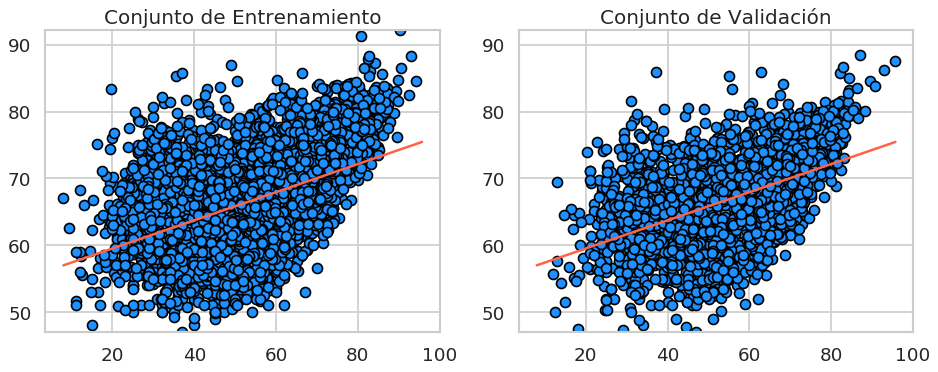

In [194]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train, X_test])
X_range_stop = np.max(np.r_[X_train, X_test])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

> ### Regresión Polinomial

Link:
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [195]:
# Separamos el "target" del resto del dataset

X = player_df.loc[:, player_df.columns != 'overall_rating']
y = player_df['overall_rating']
X = X[[
    'ball_control',
]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [196]:
polynomial_degree = [2, 3, 4, 5, 10]# TODO: Probar distintos grados del polinomio

for pol_deg in polynomial_degree:
    poly_features = PolynomialFeatures(pol_deg)
    poly_features.fit(X_train)
    X_poly_train = poly_features.transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    print("Pol Degree: {}".format(pol_deg))
    print(
        "MSE para entrenamiento: {:.2f}"
        .format(mean_squared_error(y_train, model.predict(X_poly_train)))
    )
    print(
        "MSE para validación   : {:.2f}"
        .format(mean_squared_error(y_test, model.predict(X_poly_test)))
    )
    
poly_features = PolynomialFeatures(5)
poly_features.fit(X_train)
X_poly_train = poly_features.transform(X_train)
X_poly_test = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)


Pol Degree: 2
MSE para entrenamiento: 20.67
MSE para validación   : 21.31
Pol Degree: 3
MSE para entrenamiento: 20.44
MSE para validación   : 21.08
Pol Degree: 4
MSE para entrenamiento: 20.08
MSE para validación   : 20.84
Pol Degree: 5
MSE para entrenamiento: 20.07
MSE para validación   : 20.82
Pol Degree: 10
MSE para entrenamiento: 20.04
MSE para validación   : 20.83


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### **Visualizacion**

**Warning**: Tener en cuenta que si son mas de dos features no se va a poder visualizar

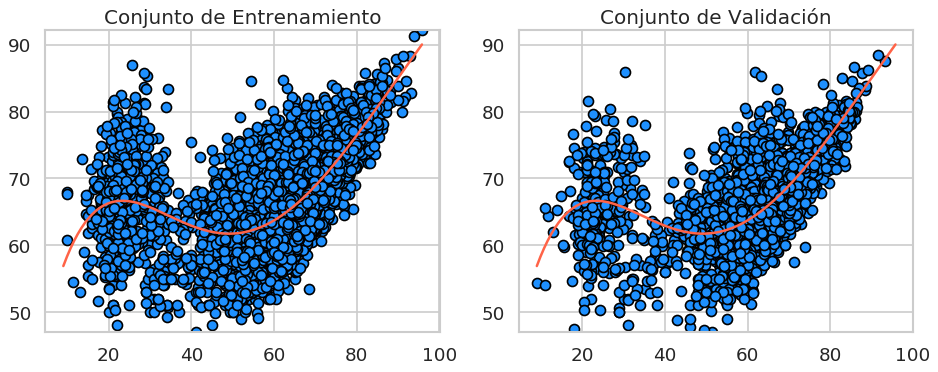

In [197]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train, X_test])
X_range_stop = np.max(np.r_[X_train, X_test])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

---

## **Clasificacion Multiclase**

Vamos a predecir el `attacking_work_rate` de un jugador

In [311]:
# Separamos el "target" del resto del dataset
player_df = pd.read_csv('../Datasets/football_player.csv')
X = player_df.loc[:, player_df.columns != 'attacking_work_rate']
y = player_df['attacking_work_rate']
y.head(10)

0    medium
1    medium
2    medium
3    medium
4    medium
5    medium
6    medium
7      high
8    medium
9    medium
Name: attacking_work_rate, dtype: object

In [312]:
# TODO: Codificar la variable categorica `attacking_work_rate` como una variable numerica
le = preprocessing.LabelEncoder()
y[:] = le.fit_transform(y)
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    0
8    2
9    2
Name: attacking_work_rate, dtype: int64

In [313]:
player_df.dtypes

player_name             object
birthday                object
age                      int64
height_m               float64
weight_kg              float64
imc                    float64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate      int64
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
intercep

Seleccionamos un feature de los listados en la descripción que no sea categórico, por ejemplo `vision`

In [314]:
# TODO: modificar esta feature por algún otro (o una combinacion de estos) para ver como cambian los resultados
X = X[[
    'dribbling',
]]

### División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o _training_) y evaluación (o _test_).

Utilizar aproximadamente 70% de los datos para entrenamiento y 30% para validación.

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> ### Regresion Logistica

In [298]:
penalty = 'l1' # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha = 1 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

model = LogisticRegression(penalty=penalty, C=1./alpha, multi_class='ovr')
model.fit(X_train, y_train)

print("Accuracy para entrenamiento: {:.2f}".format(balanced_accuracy_score(y_train, model.predict(X_train))))
print("Accuracy para validación   : {:.2f}".format(balanced_accuracy_score(y_test, model.predict(X_test))))

Accuracy para entrenamiento: 0.34
Accuracy para validación   : 0.34


#### **Matriz de Confusion**

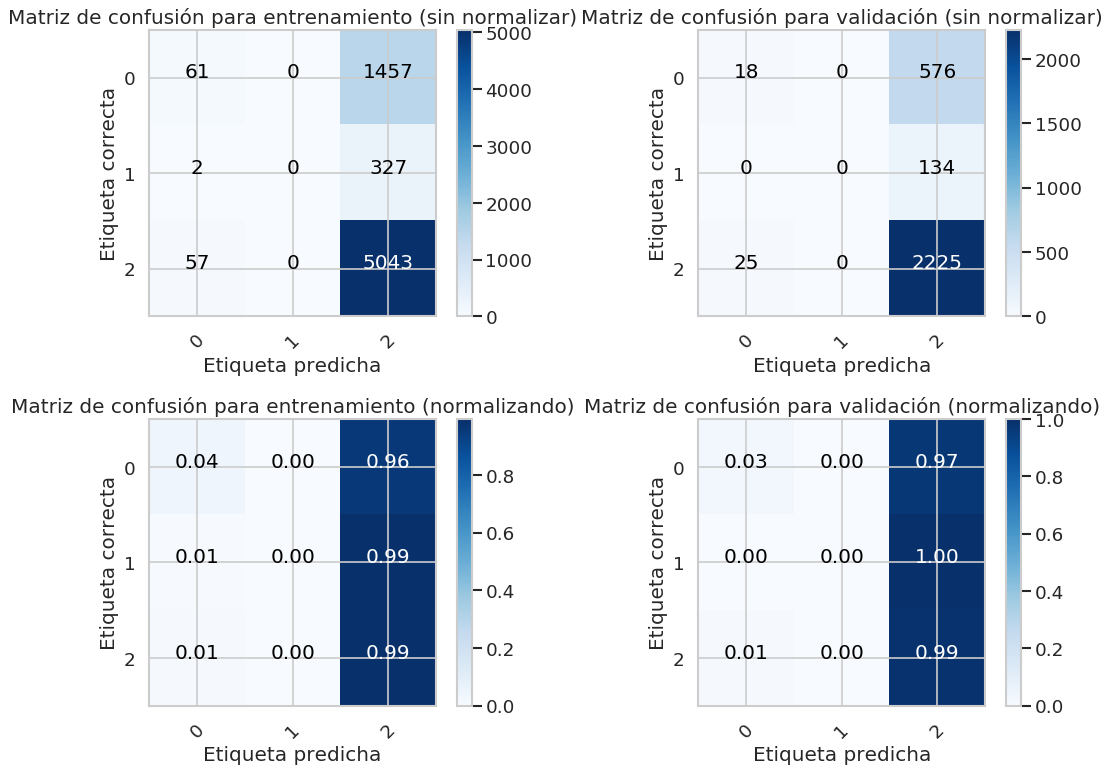

In [299]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(
    confusion_matrix(y_train, model.predict(X_train)),
    classes=np.unique(y),
    title='Matriz de confusión para entrenamiento (sin normalizar)'
)

plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_train, model.predict(X_train)),
    classes=np.unique(y),
    normalize=True,
    title='Matriz de confusión para entrenamiento (normalizando)'
)

plt.subplot(2, 2, 2)
plot_confusion_matrix(
    confusion_matrix(y_test, model.predict(X_test)),
    classes=np.unique(y),
    title='Matriz de confusión para validación (sin normalizar)'
)

plt.subplot(2, 2, 4)
plot_confusion_matrix(
    confusion_matrix(y_test, model.predict(X_test)),
    classes=np.unique(y),
    normalize=True,
    title='Matriz de confusión para validación (normalizando)'
)

plt.show()

#### Seleccion de Hiperparametros

Utilizando búsqueda exhaustiva (*grid search*) con *n-fold cross-validation* (por ejemeplo *5-fold*) y utilizando como métrica el área bajo la curva de ROC (o *ROC-AUC*), hagan una selección de los mejores hiperparámetros para su conjunto de datos y el modelo que hayan elegido en el apartado anterior.

Links:
* https://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.GridSearchCV.html

In [361]:
results = pd.DataFrame(columns=('clf', 'best_acc'))
y_train_binary = label_binarize(y_train, classes=list(set(y_train)))

In [362]:
exploring_params = {
    'C': (1e+1, 1, 1e-1),
    'multi_class': ('ovr', 'multinomial'),
    'tol': (1e-3, 1e-4, 1e-5),
    'max_iter': (10, 100, 1000),
    'solver': ('saga', 'lbfgs')
}
m = LogisticRegression(n_jobs=1, random_state=1, penalty='l1')
model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy', iid=False, error_score=0.0, n_jobs=-1)
model.fit(X_train, y_train)
best_model = model.best_estimator_
print('Best Model: ', model.best_score_)
print(best_model)
results = results.append({'clf': best_model, 'best_acc': model.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Model:  0.7354252549311532
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='saga', tol=0.001,
          verbose=0, warm_start=False)
The best classifier so far is: 
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='saga', tol=0.001,
          verbose=0, warm_start=False)


In [ ]:
exploring_params = {
    'C': (1e+1, 1, 1e-1),
    'multi_class': ('ovr', 'multinomial'),
    'tol': (1e-3, 1e-4, 1e-5),
    'max_iter': (10, 100, 1000),
    'solver': ('newton-cg', 'sag')
}
m2 = LogisticRegression(n_jobs=1, random_state=1, penalty='l2')
model2 = GridSearchCV(m2, exploring_params, cv=5, scoring='accuracy', error_score=0.0, n_jobs=-1)
y_train_binary = label_binarize(y_train, classes=list(set(y_train)))
model2.fit(X_train, y_train)
best_model2 = model2.best_estimator_
print('Best Model: ', model2.best_score_)
print(best_model2)
results = results.append({'clf': best_model2, 'best_acc': model2.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

---

**Comunicación de Resultados**

Se pide que toda esta información no quede plasmada solamente en un Jupyter Notebook, sino que se diagrame una comunicación en formato textual o interactivo (Google Docs, PDF o Markdown por ejemplo).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.